#### Example notebook to demonstrate usage of functions in biosynseq.metrics and biosynseq.visualize for the following purposes:
- Visualize embeddings for generated, test, or validation sequences using t-SNE and UMAP.
- Plot the embedding L2 distance against the pairwise global/local alignment scores for the embeddings.
- Plot the histogram distributions for each sequence metric.
- Plot the histogram distributions of mean, max, and min alignment scores between the alignment of two collections of sequences. <br>

These visualizations allow the user to evaluate the performance of a deep learning model in terms of learning important sequence properties and generating novel nucleotide sequences with relevant properties. 

In [64]:
from biosynseq import metrics
from biosynseq import visualize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from pathlib import Path
import h5py
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

In [65]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams.update({'font.size':14})

In [66]:
def get_gc(seq: np.ndarray) -> float:
    """Returns percentage GC content given sequence as a numpy array"""
    g_content = np.sum(seq == "G")
    c_content = np.sum(seq == "C")
    return (g_content + c_content) / len(seq)

def get_paint_df(dna_seqs):
    paint_df = pd.DataFrame(
        {
            "GC": metrics.gc_content(dna_seqs),
            "SequenceLength": metrics.seq_length(dna_seqs),
        }
    )
    return paint_df

def load_seqs(h5_path):
    with h5py.File(h5_path, "r") as f:
        seqs = f["sequence"][...]
        descriptions = f["description"][...]
        ids = f["id"][...]
        
#     seqs = [
#         SeqRecord(
#             Seq(seq.decode("utf-8")),
#             id=id_.decode("utf-8"),
#             name=id_.decode("utf-8"),
#             description=description.decode("utf-8"),
#         ) 
#         for seq, id_, description in zip(seqs, ids, descriptions)
#     ]

    
    return seqs, descriptions, ids


def get_classes(descriptions):
    classes = defaultdict(list)
    for item in descriptions:
        fields = item.decode("utf-8").split("|")
        classes["strain"].append(fields[0])
        classes["variant"].append(fields[1])
        classes["region"].append(fields[2])
        classes["species"].append(fields[3])
        classes["variant-label"].append(fields[1].split(".")[0])
        classes["region-label"].append(fields[2].split(":")[0])
        classes["time"].append(fields[4])
        
    return pd.DataFrame(classes)

# 1. Get t-SNE plots

### Spike sequences

In [67]:
val_embed_path = Path("/homes/abrace/data/sequences/sars-cov2-genome/spike/spike-embeddings.npy")
val_h5_path = Path("/homes/abrace/data/sequences/sars-cov2-genome/spike/Processed_Spike_ORFs_Split.h5")

seqs, descriptions, ids = load_seqs(val_h5_path)
embed_avg = np.load(val_embed_path)

In [68]:
classes = get_classes(descriptions)

In [69]:
subsample = 50
seqs_sub = seqs[::subsample]
embed_avg_sub = embed_avg[::subsample]
classes[::subsample]

strain  variant region       species variant-label  \
0        NC_045512.2         B  China  Homo sapiens             B   
50        ON338739.1    AY.100    USA  Homo sapiens            AY   
100       ON338804.1    AY.118    USA  Homo sapiens            AY   
150       ON338910.1    AY.100    USA  Homo sapiens            AY   
200       ON338970.1   AY.25.1    USA  Homo sapiens            AY   
...               ...      ...    ...           ...           ...   
1578550  >ON338697.1      AY.3    USA  Homo sapiens            AY   
1578600  >ON338697.1      AY.3    USA  Homo sapiens            AY   
1578650  >ON338697.1      AY.3    USA  Homo sapiens            AY   
1578700  >ON338697.1      AY.3    USA  Homo sapiens            AY   
1578750  >ON338697.1      AY.3    USA  Homo sapiens            AY   

        region-label        time  
0              China     2019-12  
50               USA  2021-11-29  
100              USA  2021-11-29  
150              USA  2021-12-08  
200              USA  2021-12-14  
...              ...         ...  
1578550          USA  2021-11-19  
1578600          USA  2021-11-19  
1578650          USA  2021-11-19  
1578700          USA  2021-11-19  
1578750          USA   2021-11-1  

[31576 rows x 7 columns]

In [70]:
Counter(classes["region-label"])

Counter({'China': 392,
         'USA': 1269982,
         'South Africa': 1220,
         'France': 12137,
         'Japan': 4056,
         'Djibouti': 534,
         'United Kingdom': 14431,
         'Belgium': 19,
         'Spain': 948,
         'Malawi': 109,
         'India': 1782,
         'Bahrain': 3593,
         'Iran': 162,
         'Brazil': 261,
         'Taiwan': 147,
         'Canada': 34,
         'Norway': 5,
         'Switzerland': 56253,
         'Thailand': 478,
         'Kenya': 270,
         'Colombia': 24,
         'Peru': 136,
         'Chile': 443,
         'Mexico': 1821,
         'Singapore': 6,
         'Germany': 161486,
         'Austria': 246,
         '': 126,
         'Ireland': 4,
         'Argentina': 38,
         'Puerto Rico': 508,
         'Russia': 62,
         'Slovakia': 6149,
         'Myanmar': 59,
         'Bangladesh': 918,
         'Hong Kong': 1705,
         'Viet Nam': 8,
         'Paraguay': 260,
         'Jamaica': 339,
         'Dominican R

In [71]:
from collections import Counter

In [72]:
Counter(classes["variant-label"])

Counter({'B': 447206,
         'AY': 790406,
         'BA': 303440,
         'Unassigned': 398,
         'XE': 21,
         'XN': 1,
         'A': 3711,
         'XB': 1189,
         'C': 2468,
         'P': 13100,
         'Q': 4603,
         'AH': 46,
         'W': 37,
         'N': 155,
         'XD': 1,
         'R': 1295,
         'unclassifiable': 773,
         'AZ': 344,
         'XS': 16,
         'BB': 141,
         'XG': 1,
         'L': 88,
         'AD': 29,
         'AS': 1,
         'AP': 1,
         'AV': 60,
         'D': 9067,
         'K': 1,
         'AA': 35,
         'AT': 3,
         'U': 1,
         'AF': 17,
         'Y': 5,
         'AN': 12,
         'AG': 2,
         'AK': 5,
         'M': 1,
         'V': 1,
         'AE': 70})

array([[<AxesSubplot:title={'center':'variant-label'}>]], dtype=object)

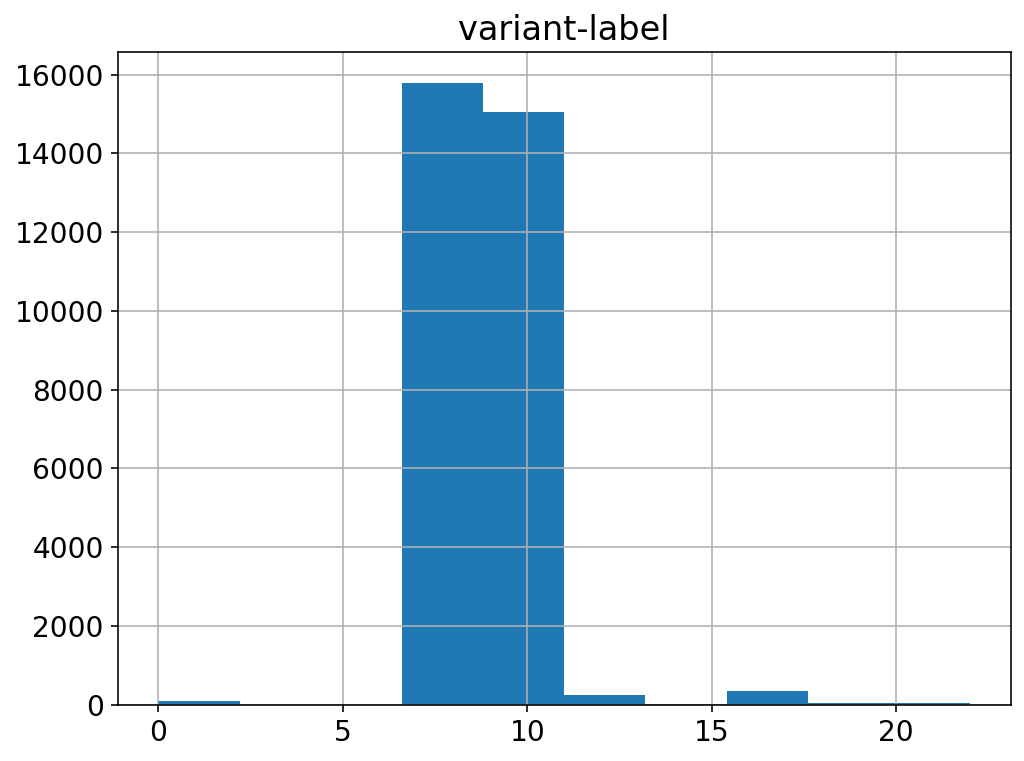

In [73]:
varient_enc = LabelEncoder()
labels = varient_enc.fit_transform(classes["variant-label"][::subsample])
labels = pd.DataFrame({"variant-label": labels})
labels.hist()

<AxesSubplot:>

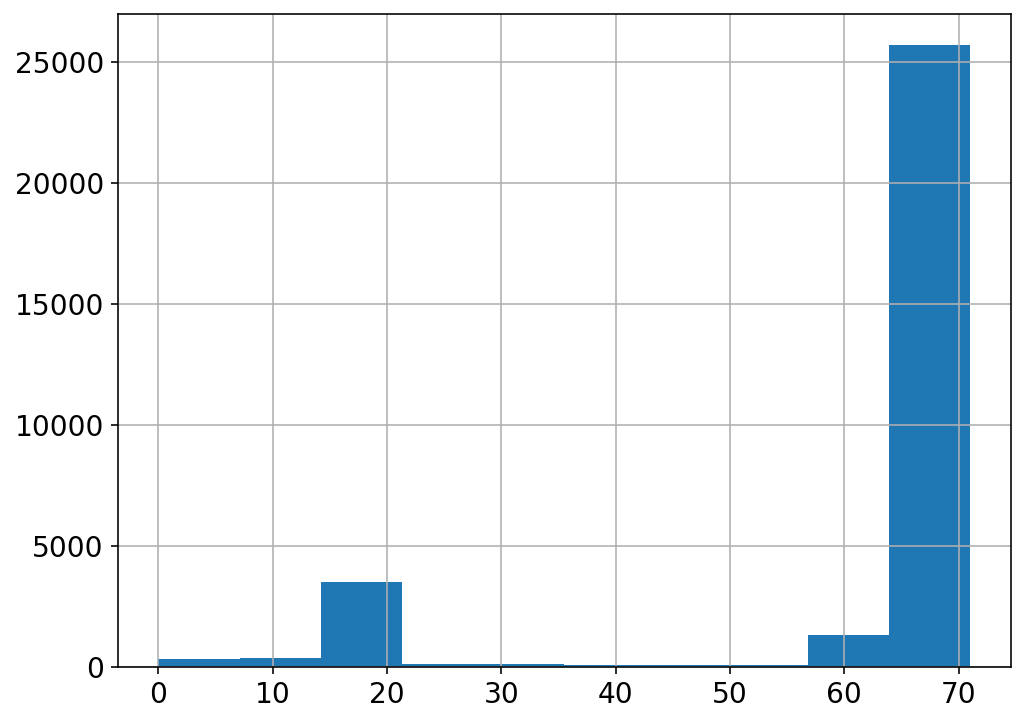

In [74]:
region_enc = LabelEncoder()
region_labels = region_enc.fit_transform(classes["region-label"][::subsample])
labels["region-label"] = region_labels
labels["region-label"].hist()

[W] [23:22:31.504001] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


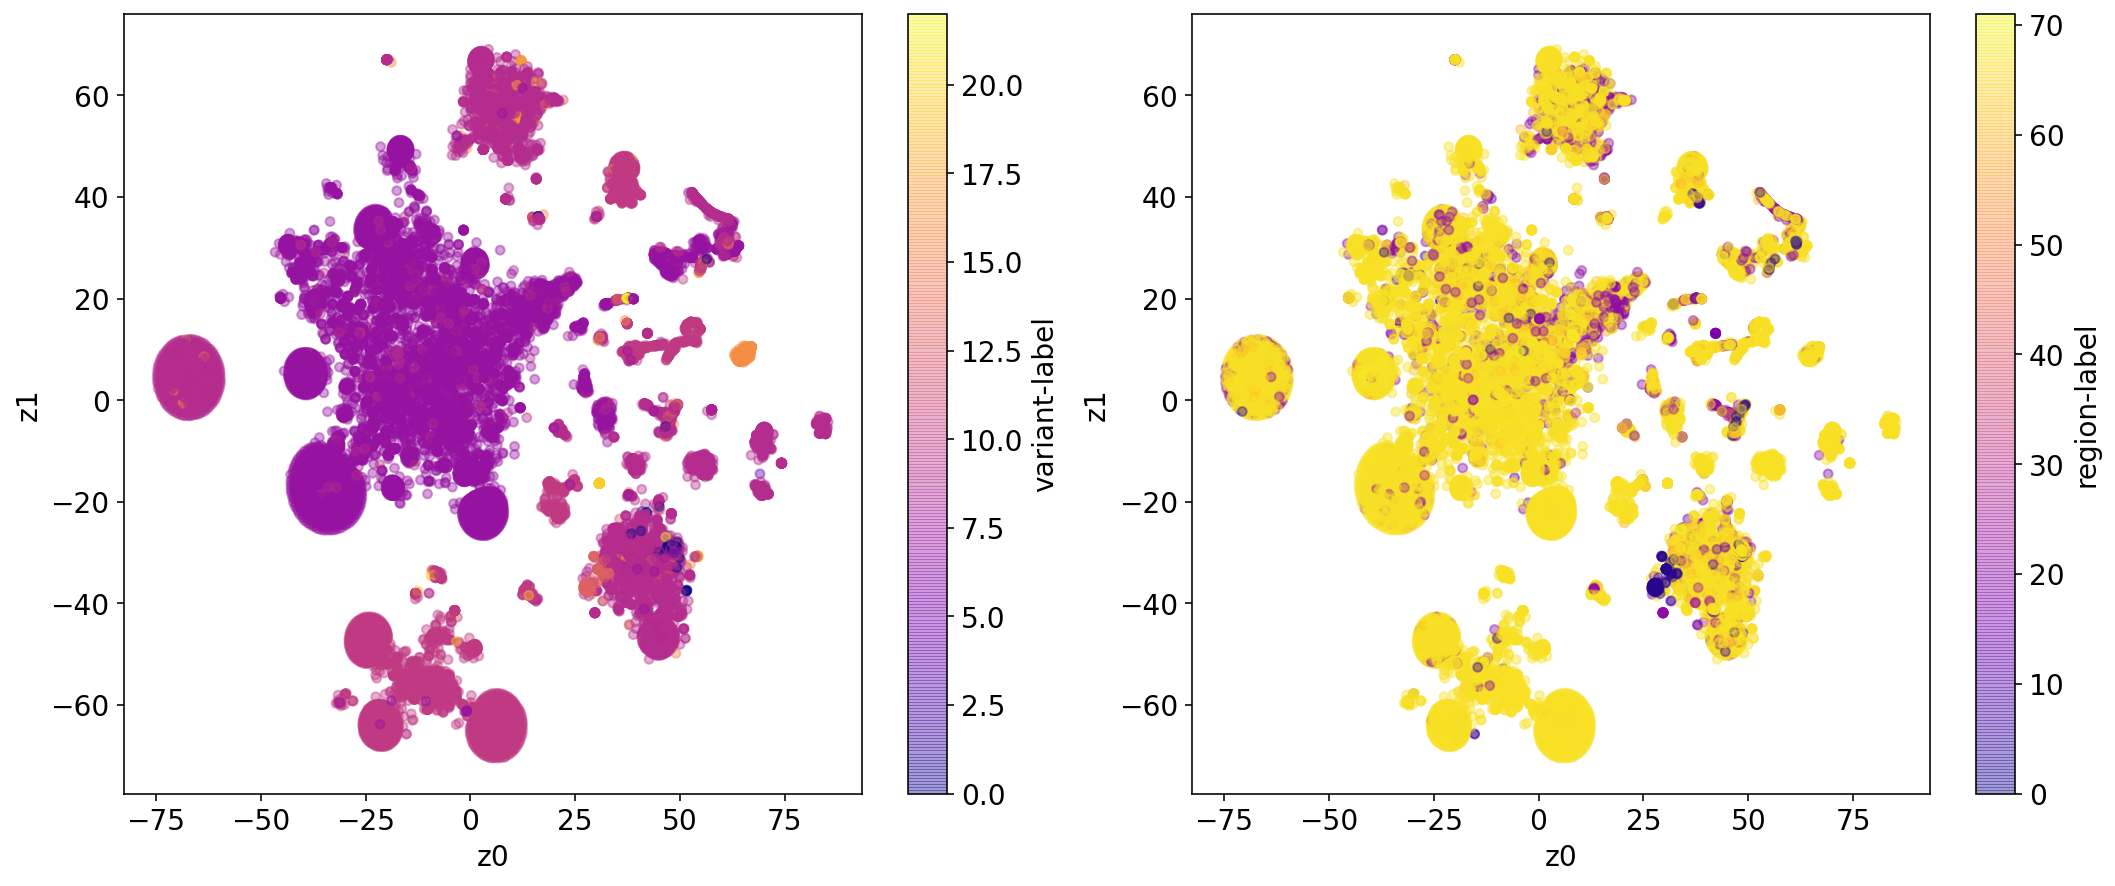

In [75]:
# if getting all plots as subplots of a collective image, add the argument get_subplots=True
df = visualize.get_cluster(embed_data=embed_avg_sub, paint_df=labels, tsne_umap="tsne", get_subplots=True)
#visualize.get_cluster(embed_data=embed_avg_sub, paint_df=labels, tsne_umap="umap", get_subplots=True)

In [76]:
plot_df = df["variant-label"]
plot_df["region-label"] = df["region-label"]["region-label"]
plot_df["real-variant-label"] = varient_enc.inverse_transform(plot_df["variant-label"])
plot_df["real-region-label"] = region_enc.inverse_transform(plot_df["region-label"])

In [77]:
plot_df["real-variant-label"] = enc.inverse_transform(plot_df["variant-label"])

In [78]:
sorted_df = plot_df.sort_values(by=['real-variant-label'])

In [79]:
sorted_df

z0         z1  variant-label  region-label real-variant-label  \
31284  48.273254 -29.201929              0            67                  A   
31465  47.717407 -28.458405              0            67                  A   
31479  48.736252 -30.056219              0            67                  A   
31483  47.714531 -28.462030              0             3                  A   
31484  48.294991 -29.196775              0             3                  A   
...          ...        ...            ...           ...                ...   
31149  37.336464  20.048740             22            28     unclassifiable   
2279  -20.097235 -49.176144             22            64     unclassifiable   
2280   38.022686  45.823330             22            64     unclassifiable   
31496  37.338108  20.049568             22             9     unclassifiable   
30475  37.337482  20.049349             22            25     unclassifiable   

      real-region-label  
31284               USA  
31465               USA  
31479               USA  
31483         Australia  
31484         Australia  
...                 ...  
31149              Iran  
2279           Thailand  
2280           Thailand  
31496             China  
30475           Hungary  

[31576 rows x 6 columns]

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

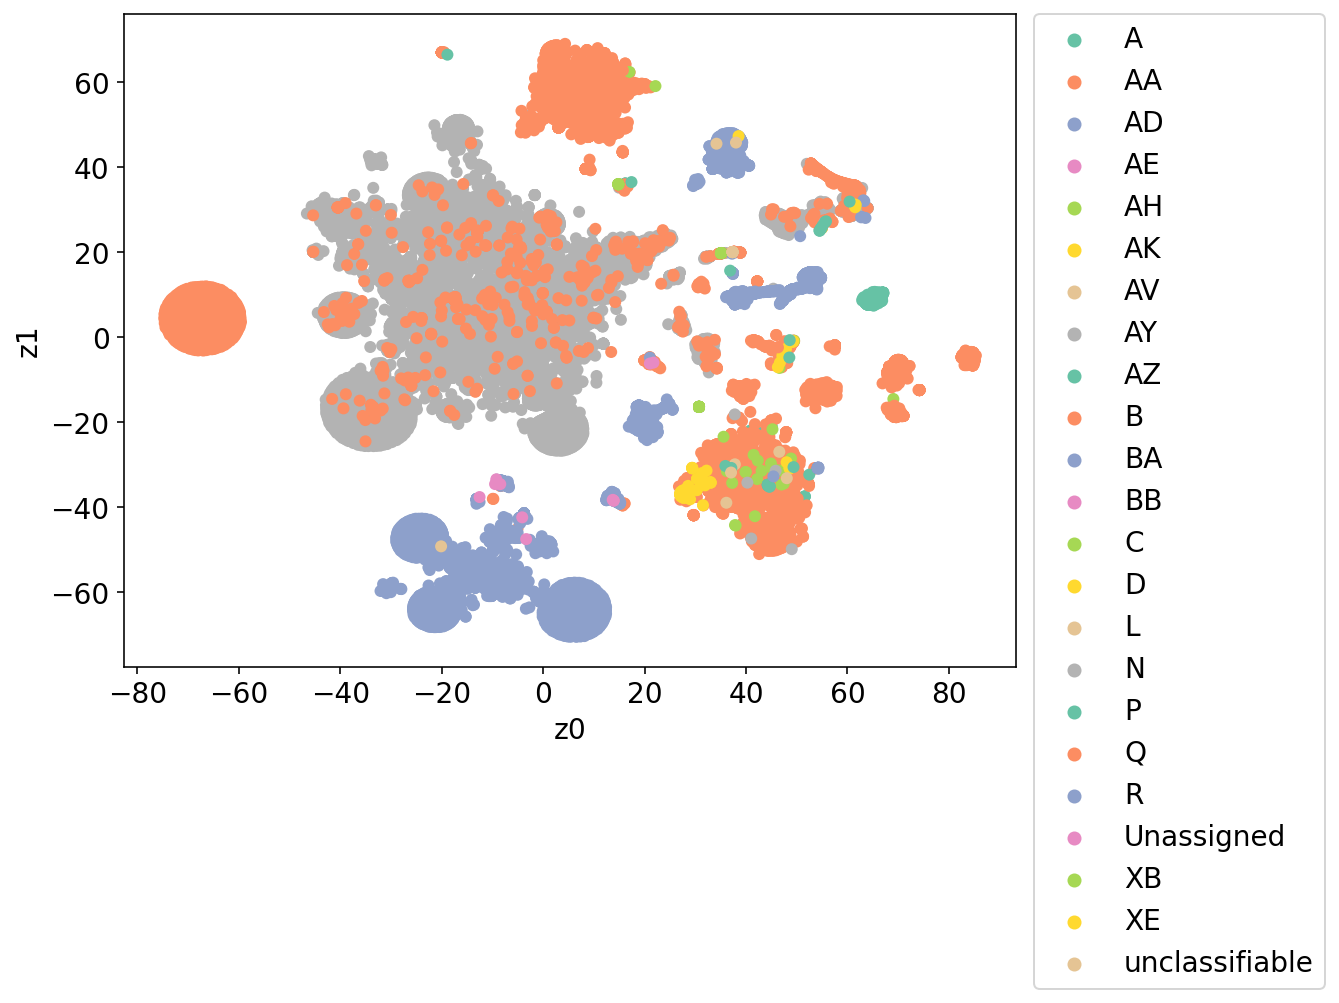

In [81]:
ax = sns.scatterplot(x='z0', y='z1', data=sorted_df, hue="real-variant-label", palette="Set2", ec=None)
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

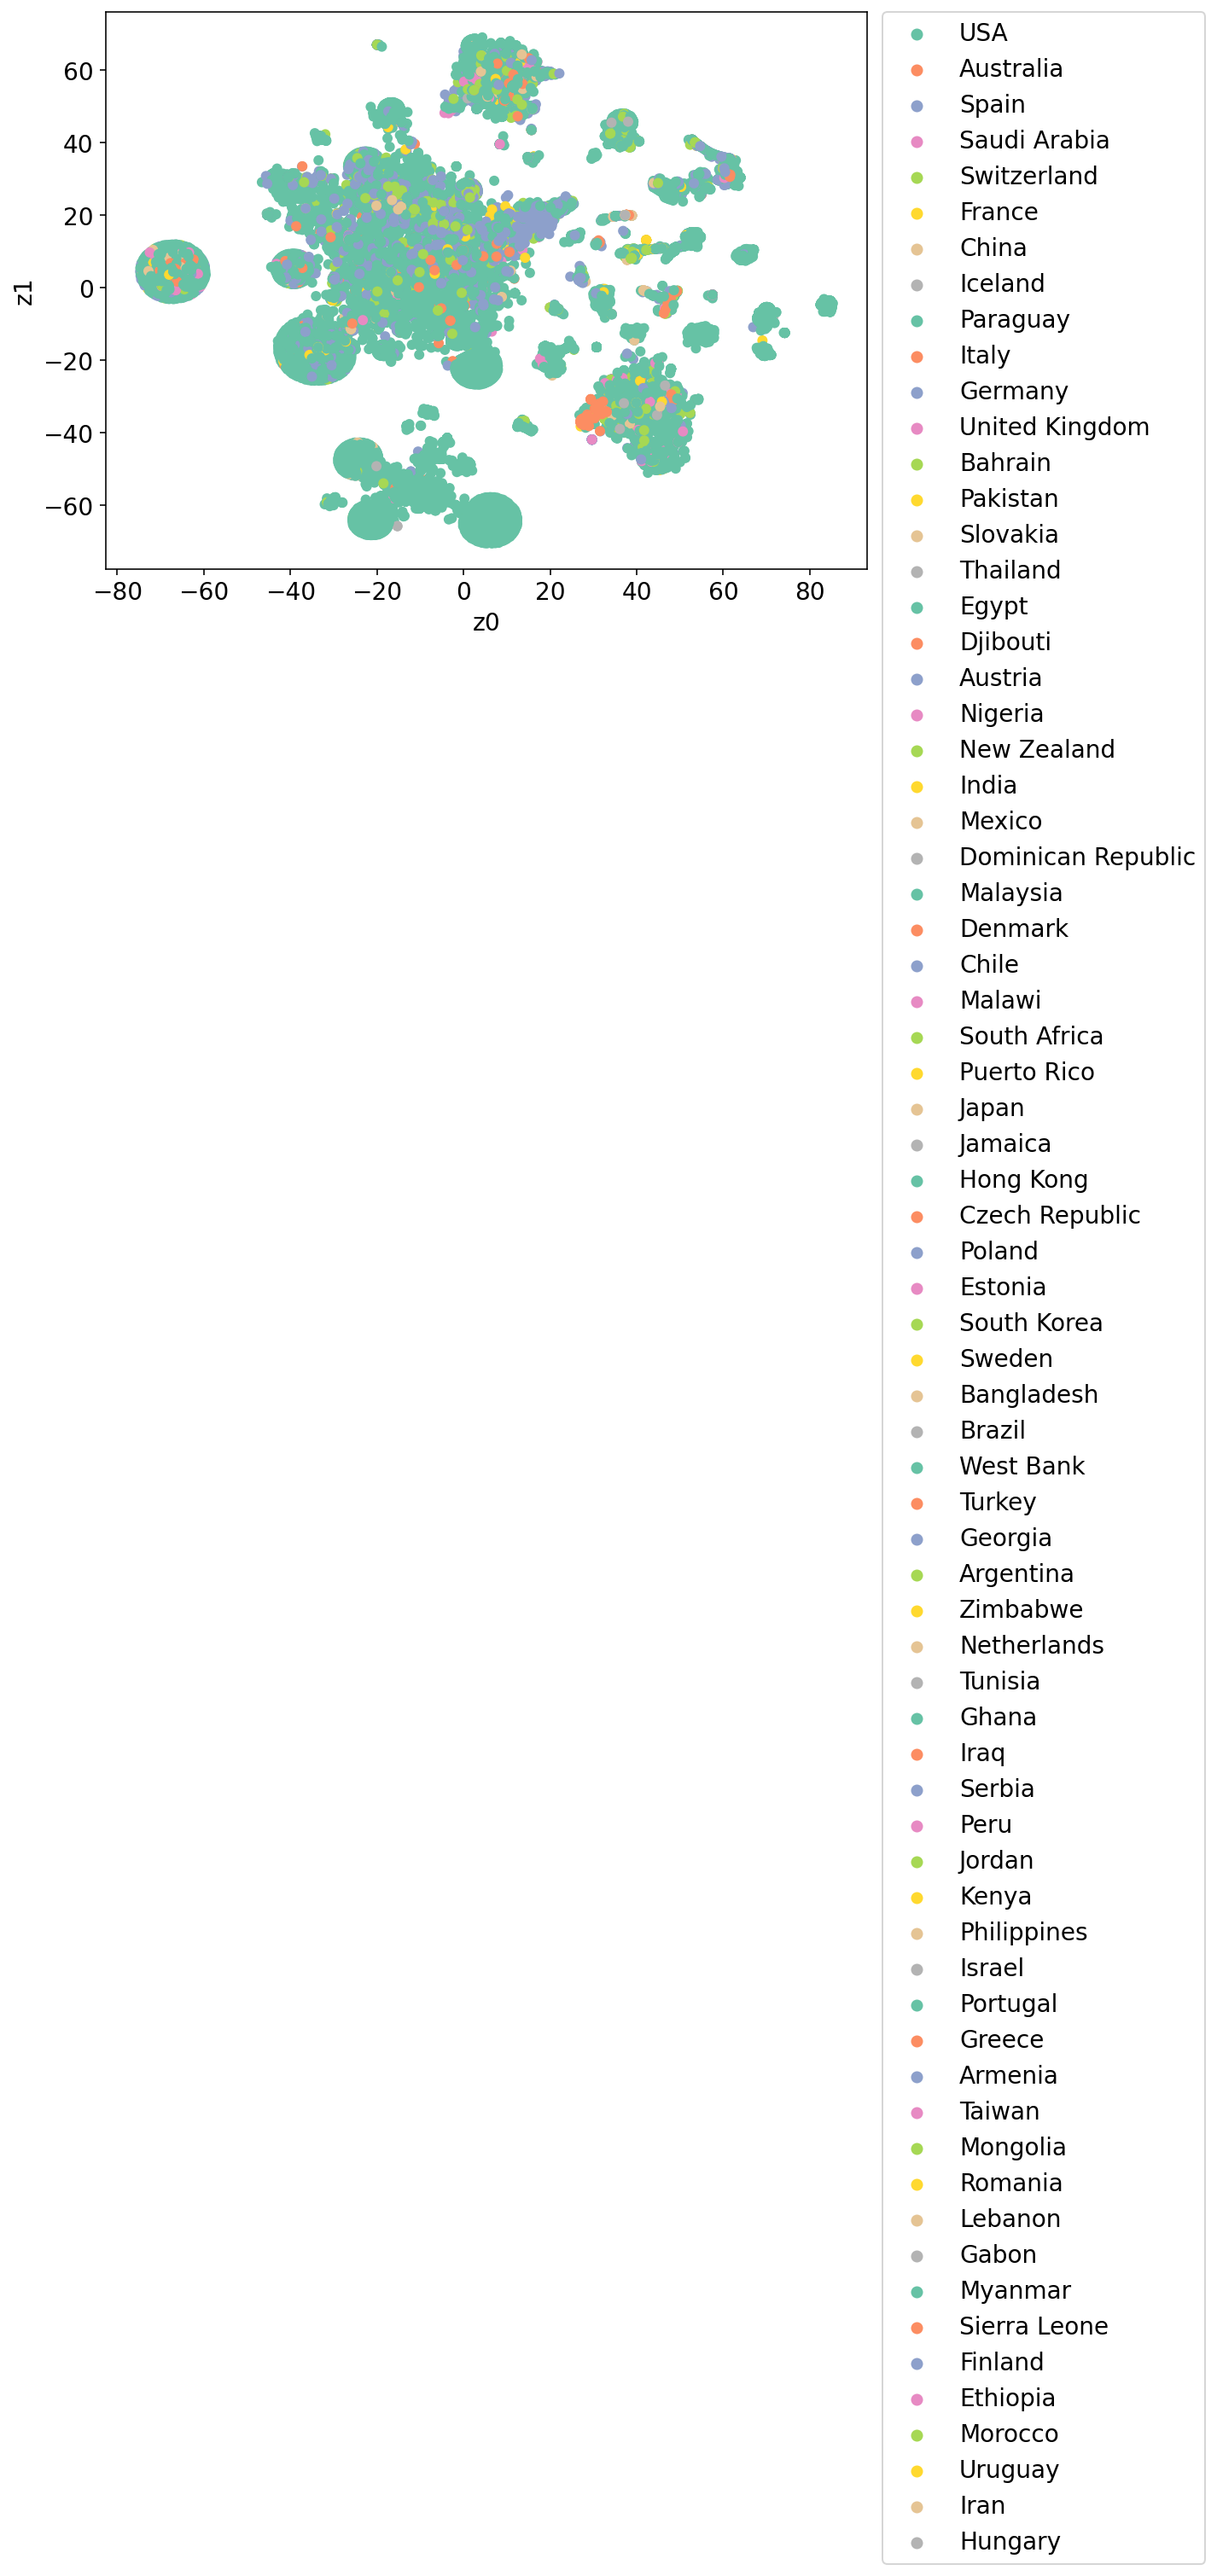

In [82]:
ax = sns.scatterplot(x='z0', y='z1', data=sorted_df, hue="real-region-label", palette="Set2", ec=None)
ax.legend(bbox_to_anchor=(1.02, 1), borderaxespad=0)
plt.show()

ID: fig|2697049.1489745.CDS.13
Name: fig|2697049.1489745.CDS.13
Description: fig|2697049.1489745.CDS.13 nucleocapsid phosphoprotein
Number of features: 0
Seq('ATGTCTGATAATGGACCCCAAAATCAGCGAAATGCACCCCGCATTACGTTTGGT...TAA')


{'GC':              z0         z1         GC
 0     -0.330744  -9.509017  47.063492
 1     -8.741838  12.144857  47.002398
 2      8.464894  -3.230433  46.904762
 3      8.734527  -1.804929  47.063492
 4     11.029934  -2.810480  47.063492
 ...         ...        ...        ...
 2458  11.147853  -2.825705  46.904762
 2459   7.920519  -4.178016  47.063492
 2460  -9.825988  12.344704  47.002398
 2461   5.939933  -1.436162  46.984127
 2462   3.609828  -0.867746  46.984127
 
 [2463 rows x 3 columns],
 'SequenceLength':              z0         z1  SequenceLength
 0     -0.330744  -9.509017            1260
 1     -8.741838  12.144857            1251
 2      8.464894  -3.230433            1260
 3      8.734527  -1.804929            1260
 4     11.029934  -2.810480            1260
 ...         ...        ...             ...
 2458  11.147853  -2.825705            1260
 2459   7.920519  -4.178016            1260
 2460  -9.825988  12.344704            1251
 2461   5.939933  -1.436162            1

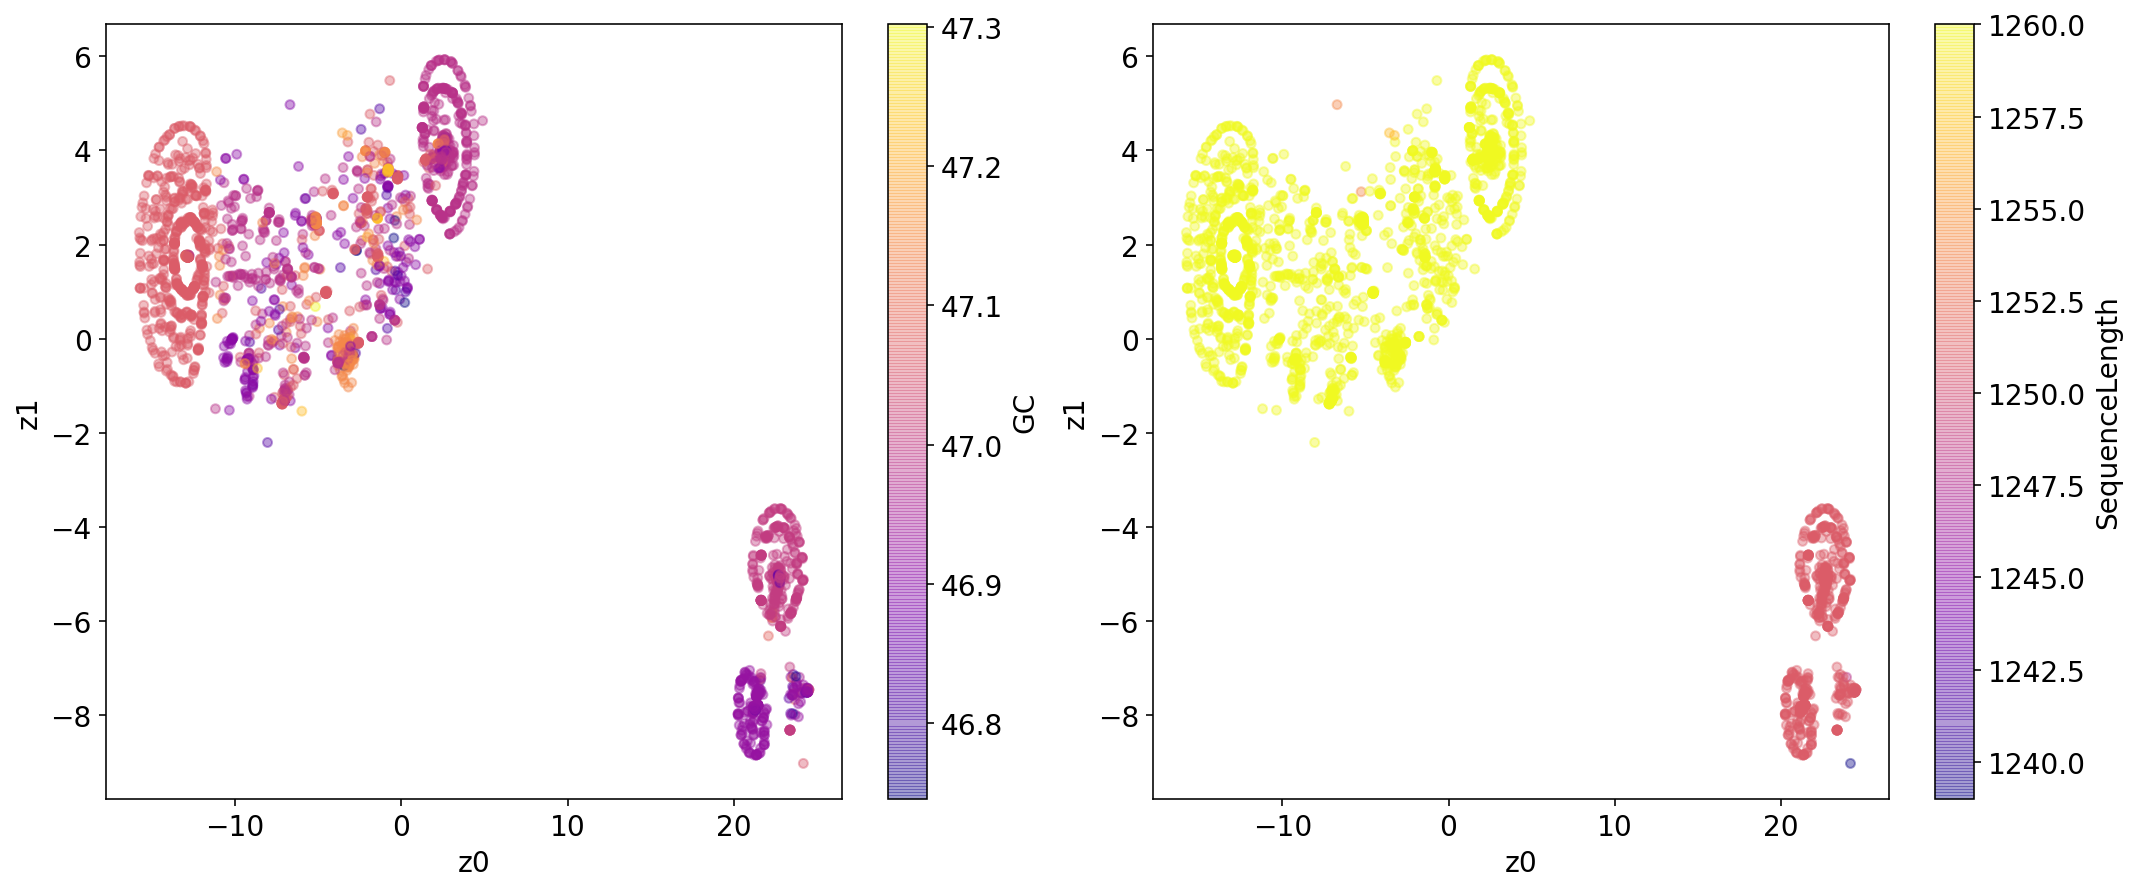

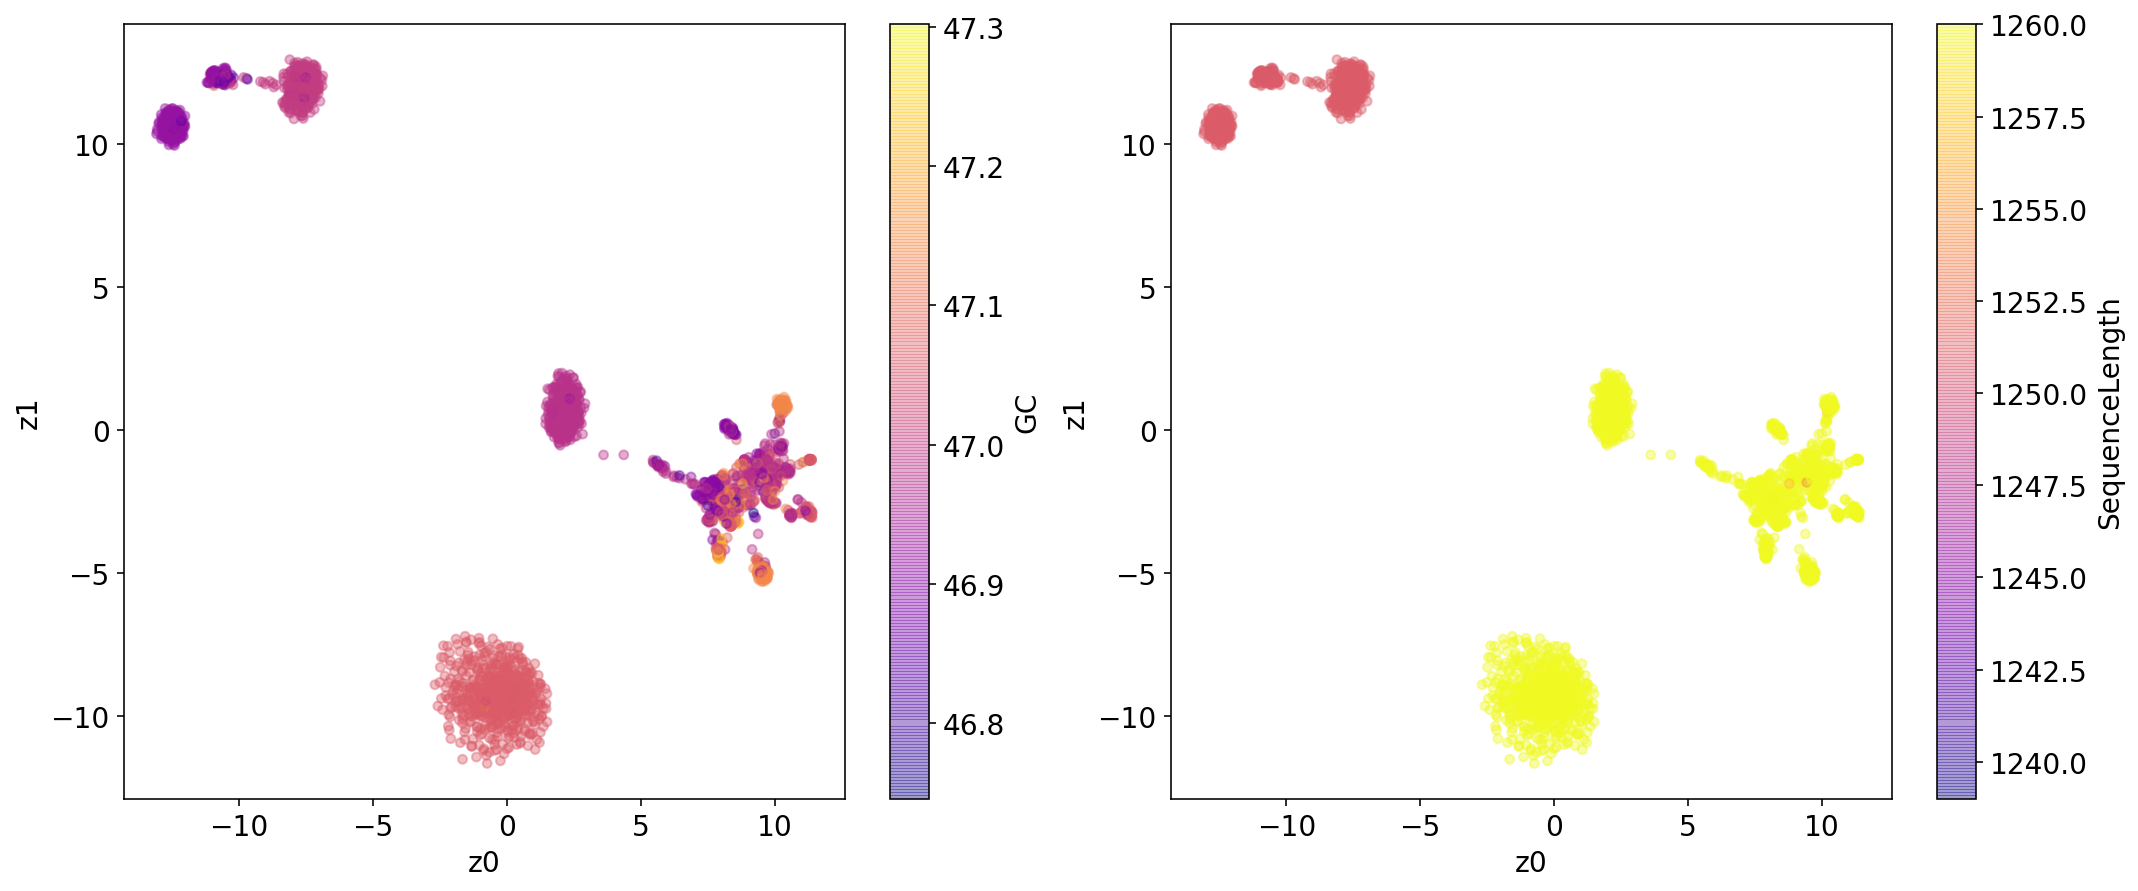

In [6]:
val_embed_path = Path("/homes/abrace/data/sequences/sars-cov2-genome/nucleocapsid/nucleocapsid-val-embeddings.npy")
val_h5_path = Path("/homes/abrace/data/sequences/sars-cov2-genome/nucleocapsid/nucleocapsid-val.h5")

val_sequences = load_seqs(val_h5_path)
embed_avg = np.load(val_embed_path)
print(val_sequences[0])

subsample = 100
val_sequences = val_sequences[::subsample]
embed_avg = embed_avg[::subsample]

val_paint_df = get_paint_df(val_sequences)
# if getting all plots as subplots of a collective image, add the argument get_subplots=True
visualize.get_cluster(embed_data=embed_avg, paint_df=val_paint_df, tsne_umap="tsne", get_subplots=True)
visualize.get_cluster(embed_data=embed_avg, paint_df=val_paint_df, tsne_umap="umap", get_subplots=True)

/lambda_stor/homes/abrace/src/mdlearn/conda-env/lib/python3.7/site-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


{'GC':             z0         z1         GC
 0     1.309491 -10.311531  60.403397
 1    -1.007150  -2.764040  67.085954
 2    -1.075281  -6.967322  50.854701
 3    -0.784353   7.864818  56.394763
 4    -3.544808  -6.646600  36.781609
 ...        ...        ...        ...
 3659  3.402737   6.886371  66.051282
 3660  0.680001  -8.518583  46.078431
 3661 -1.592619  -4.547286  56.948798
 3662 -2.363763  -8.002912  42.010582
 3663 -1.505631  10.946307  55.367232
 
 [3664 rows x 3 columns],
 'SequenceLength':             z0         z1  SequenceLength
 0     1.309491 -10.311531             942
 1    -1.007150  -2.764040             954
 2    -1.075281  -6.967322             936
 3    -0.784353   7.864818             993
 4    -3.544808  -6.646600             957
 ...        ...        ...             ...
 3659  3.402737   6.886371             975
 3660  0.680001  -8.518583             918
 3661 -1.592619  -4.547286             957
 3662 -2.363763  -8.002912             945
 3663 -1.505631  10

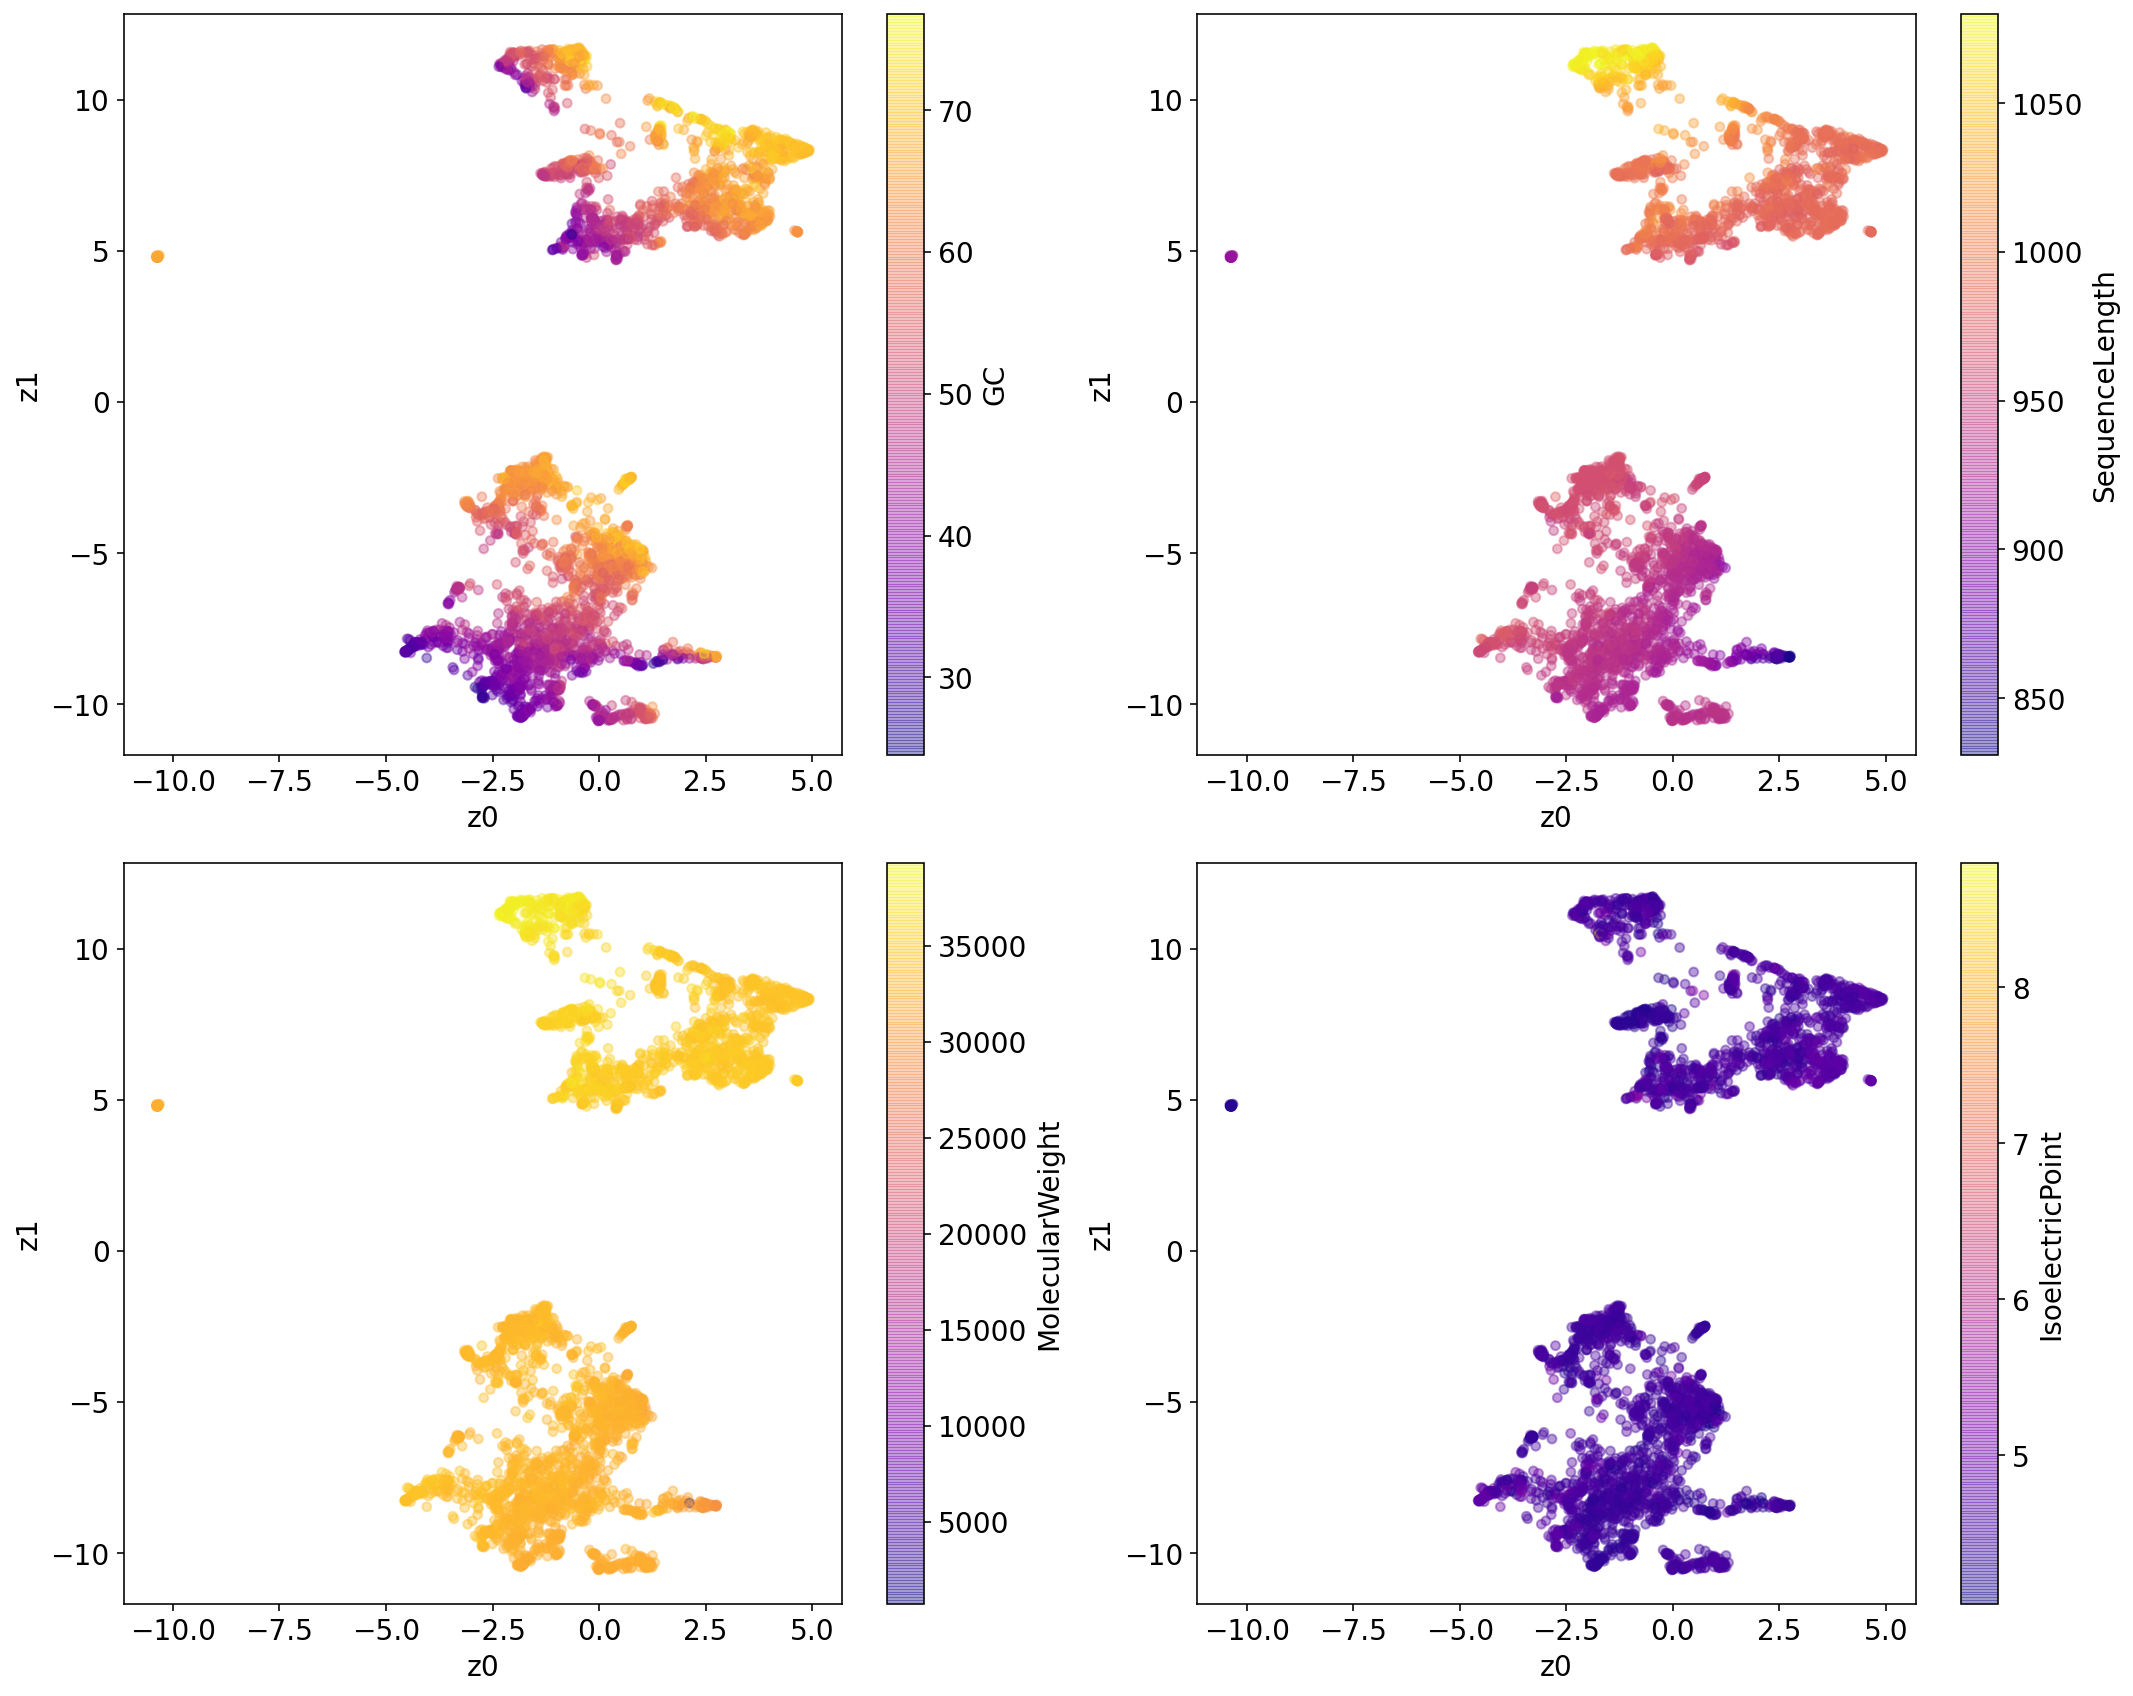

In [67]:
val_embed_path = Path("/homes/abrace/data/mdh/polaris-gptneox-25M-patric-foundation-inference-on-mdh/mdh_val_embeddings.npy")
val_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/val_folder_concatenated.fasta")

embed_avg = np.load(val_embed_path)
val_paint_df = visualize.get_paint_df(fasta_path=val_fasta_path, embed_path=val_embed_path)
# if getting all plots as subplots of a collective image, add the argument get_subplots=True
visualize.get_cluster(embed_data=embed_avg, paint_df=val_paint_df, tsne_umap="umap", get_subplots=True)

# Train sequences

/lambda_stor/homes/abrace/src/mdlearn/conda-env/lib/python3.7/site-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


[W] [16:01:13.767376] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


{'GC':                z0          z1         GC
 0     -130.055573  -89.793877  66.768293
 1        4.270699  147.618393  47.956989
 2       47.814270   17.737022  62.962963
 3       45.087902 -165.077637  63.780261
 4      -37.376717  -11.617303  45.463812
 ...           ...         ...        ...
 29299   40.968193  -76.654404  60.332295
 29300  -27.279219  215.606888  67.868852
 29301   14.457362 -170.467331  70.833333
 29302  121.226898  120.439407  51.816239
 29303  -15.107643  132.024765  41.827957
 
 [29304 rows x 3 columns],
 'SequenceLength':                z0          z1  SequenceLength
 0     -130.055573  -89.793877             984
 1        4.270699  147.618393             930
 2       47.814270   17.737022             945
 3       45.087902 -165.077637            1074
 4      -37.376717  -11.617303             981
 ...           ...         ...             ...
 29299   40.968193  -76.654404             963
 29300  -27.279219  215.606888             915
 29301   14.457362 -

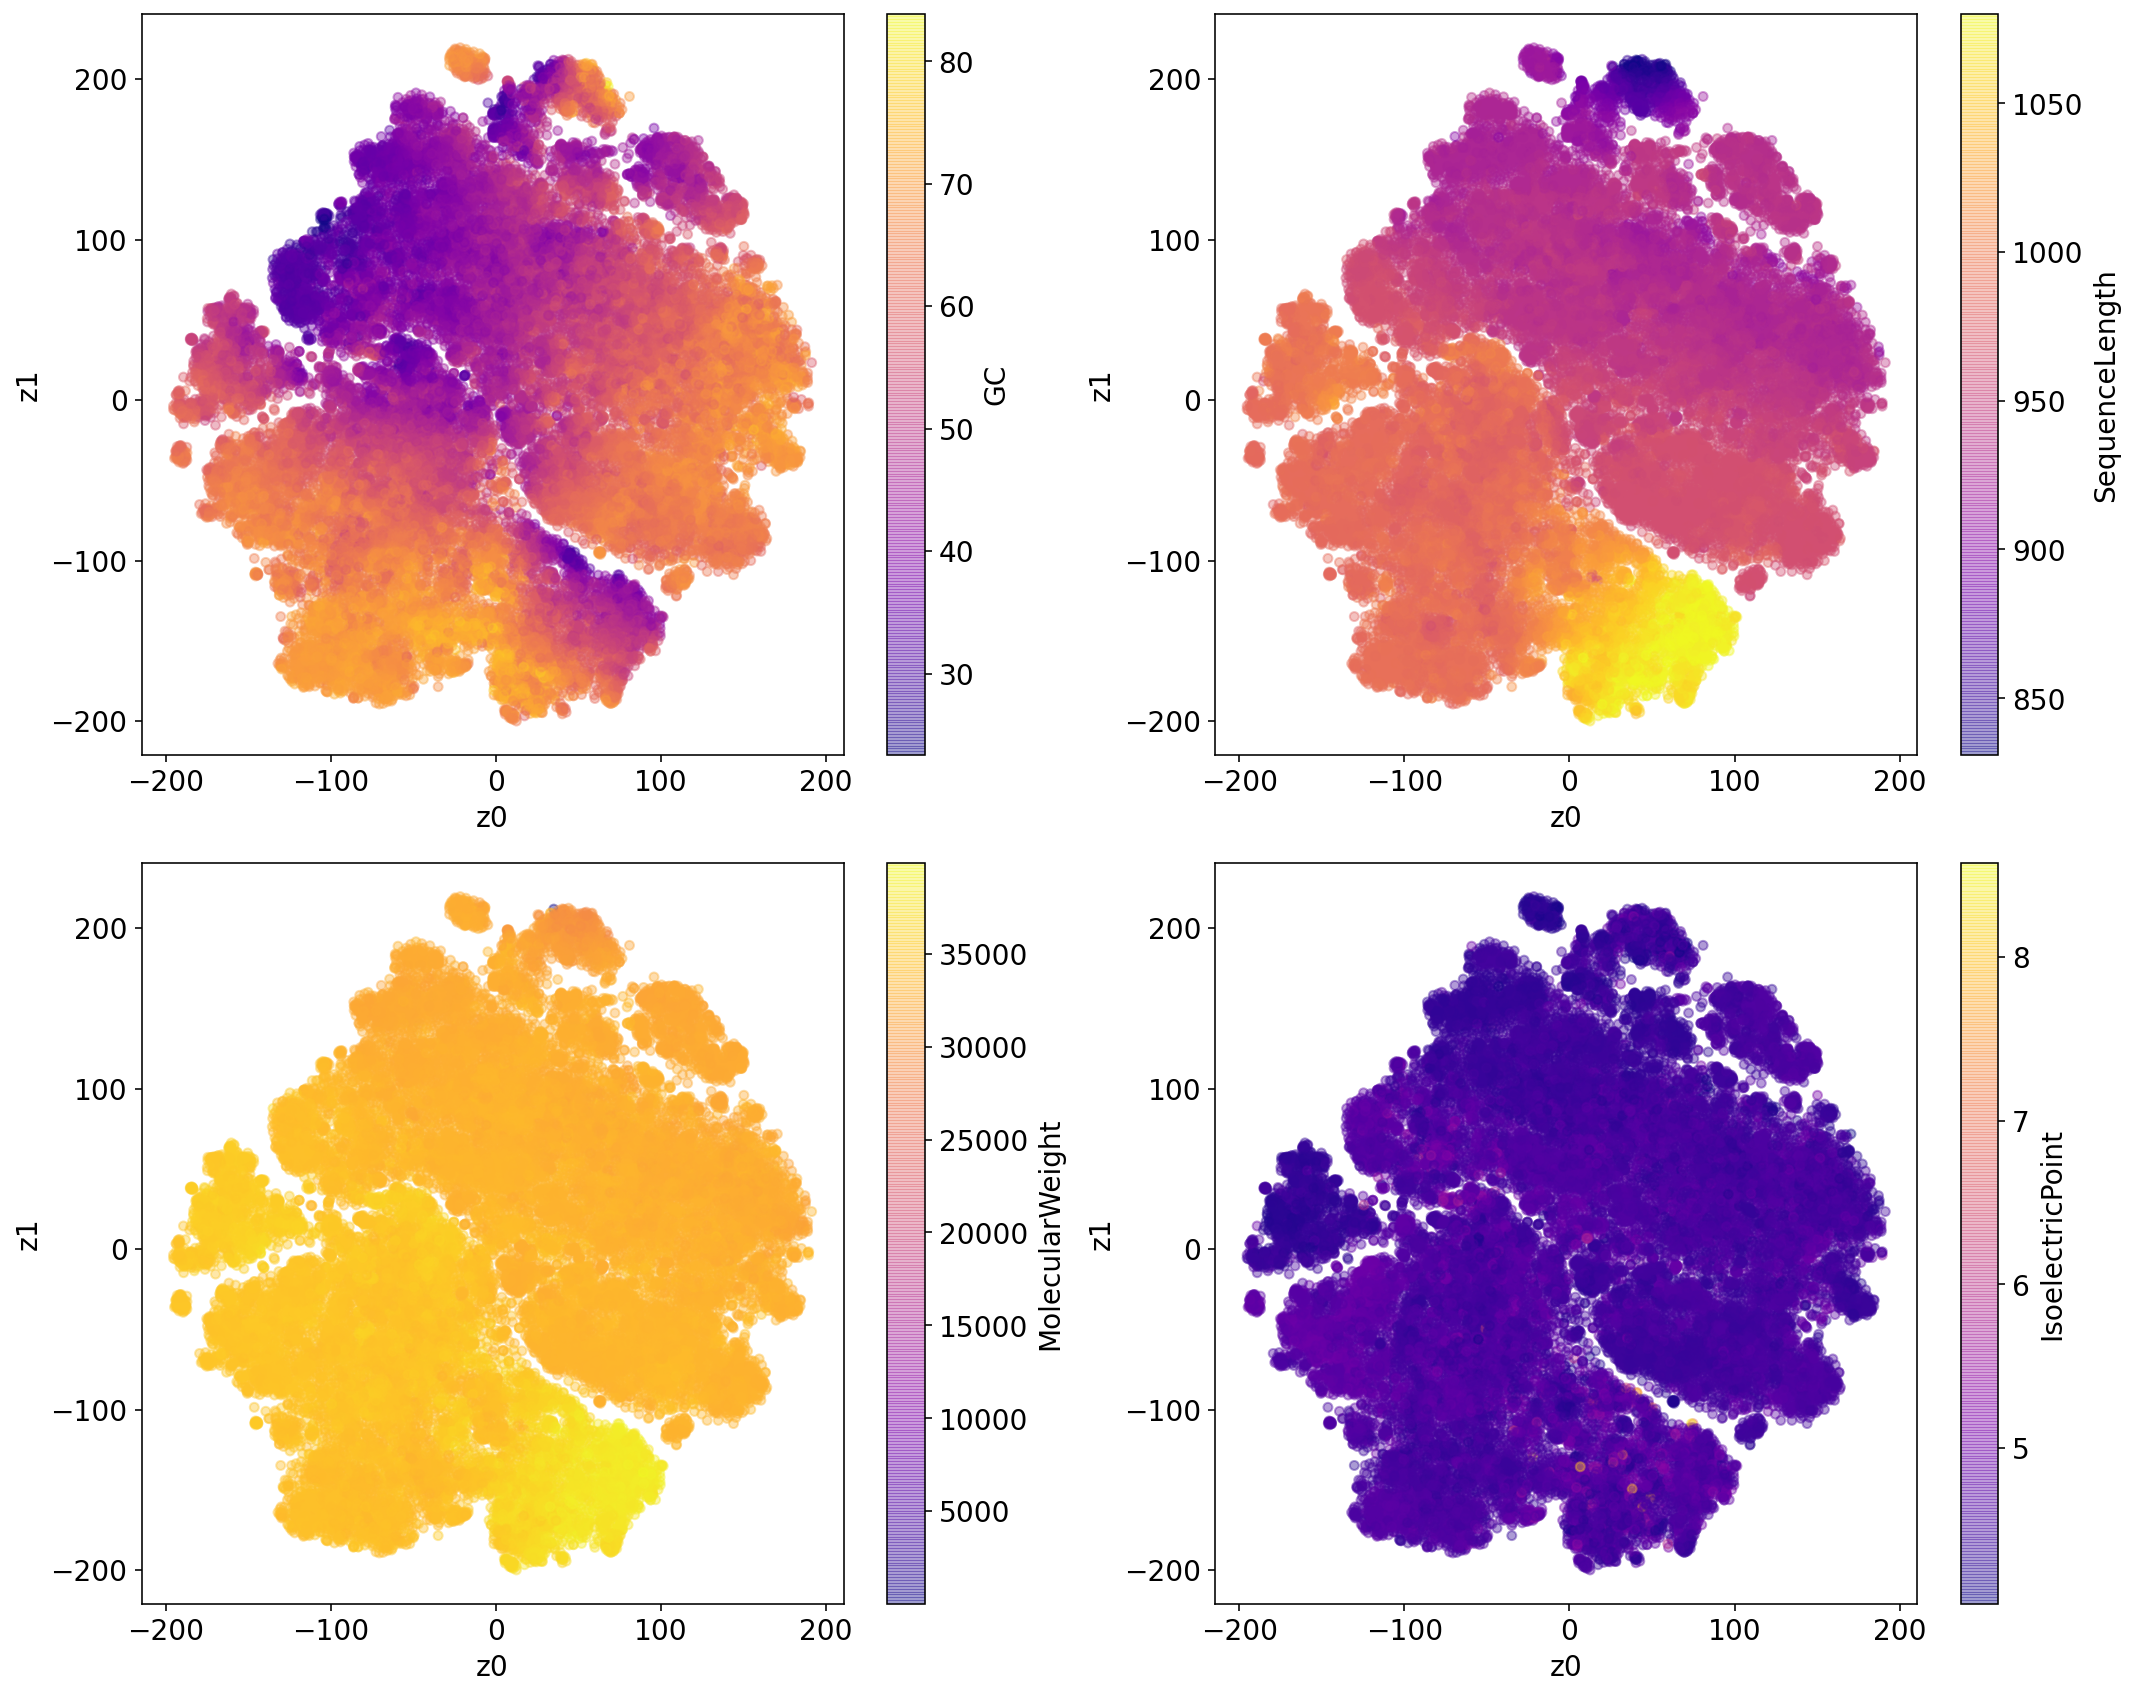

In [68]:
train_embed_path = Path("/homes/abrace/data/mdh/polaris-gptneox-25M-patric-foundation-inference-on-mdh/mdh_train_embeddings.npy")
train_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/train_folder_concatenated.fasta")

embed_avg = np.load(train_embed_path)
val_paint_df = visualize.get_paint_df(fasta_path=train_fasta_path, embed_path=train_embed_path)
# if getting all plots as subplots of a collective image, add the argument get_subplots=True
visualize.get_cluster(embed_data=embed_avg, paint_df=val_paint_df, tsne_umap="tsne", get_subplots=True)

/lambda_stor/homes/abrace/src/mdlearn/conda-env/lib/python3.7/site-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


{'GC':              z0         z1         GC
 0      7.843177   0.882790  66.768293
 1     -3.088125  -0.833925  47.956989
 2     -5.866735  -2.449618  62.962963
 3      2.944121   9.739581  63.780261
 4      3.763848   2.821989  45.463812
 ...         ...        ...        ...
 29299 -2.889174  -6.027697  60.332295
 29300  5.900356 -12.571934  67.868852
 29301  3.510355   9.117654  70.833333
 29302  1.521992  -7.921659  51.816239
 29303 -2.710128  -0.704736  41.827957
 
 [29304 rows x 3 columns],
 'SequenceLength':              z0         z1  SequenceLength
 0      7.843177   0.882790             984
 1     -3.088125  -0.833925             930
 2     -5.866735  -2.449618             945
 3      2.944121   9.739581            1074
 4      3.763848   2.821989             981
 ...         ...        ...             ...
 29299 -2.889174  -6.027697             963
 29300  5.900356 -12.571934             915
 29301  3.510355   9.117654            1056
 29302  1.521992  -7.921659            

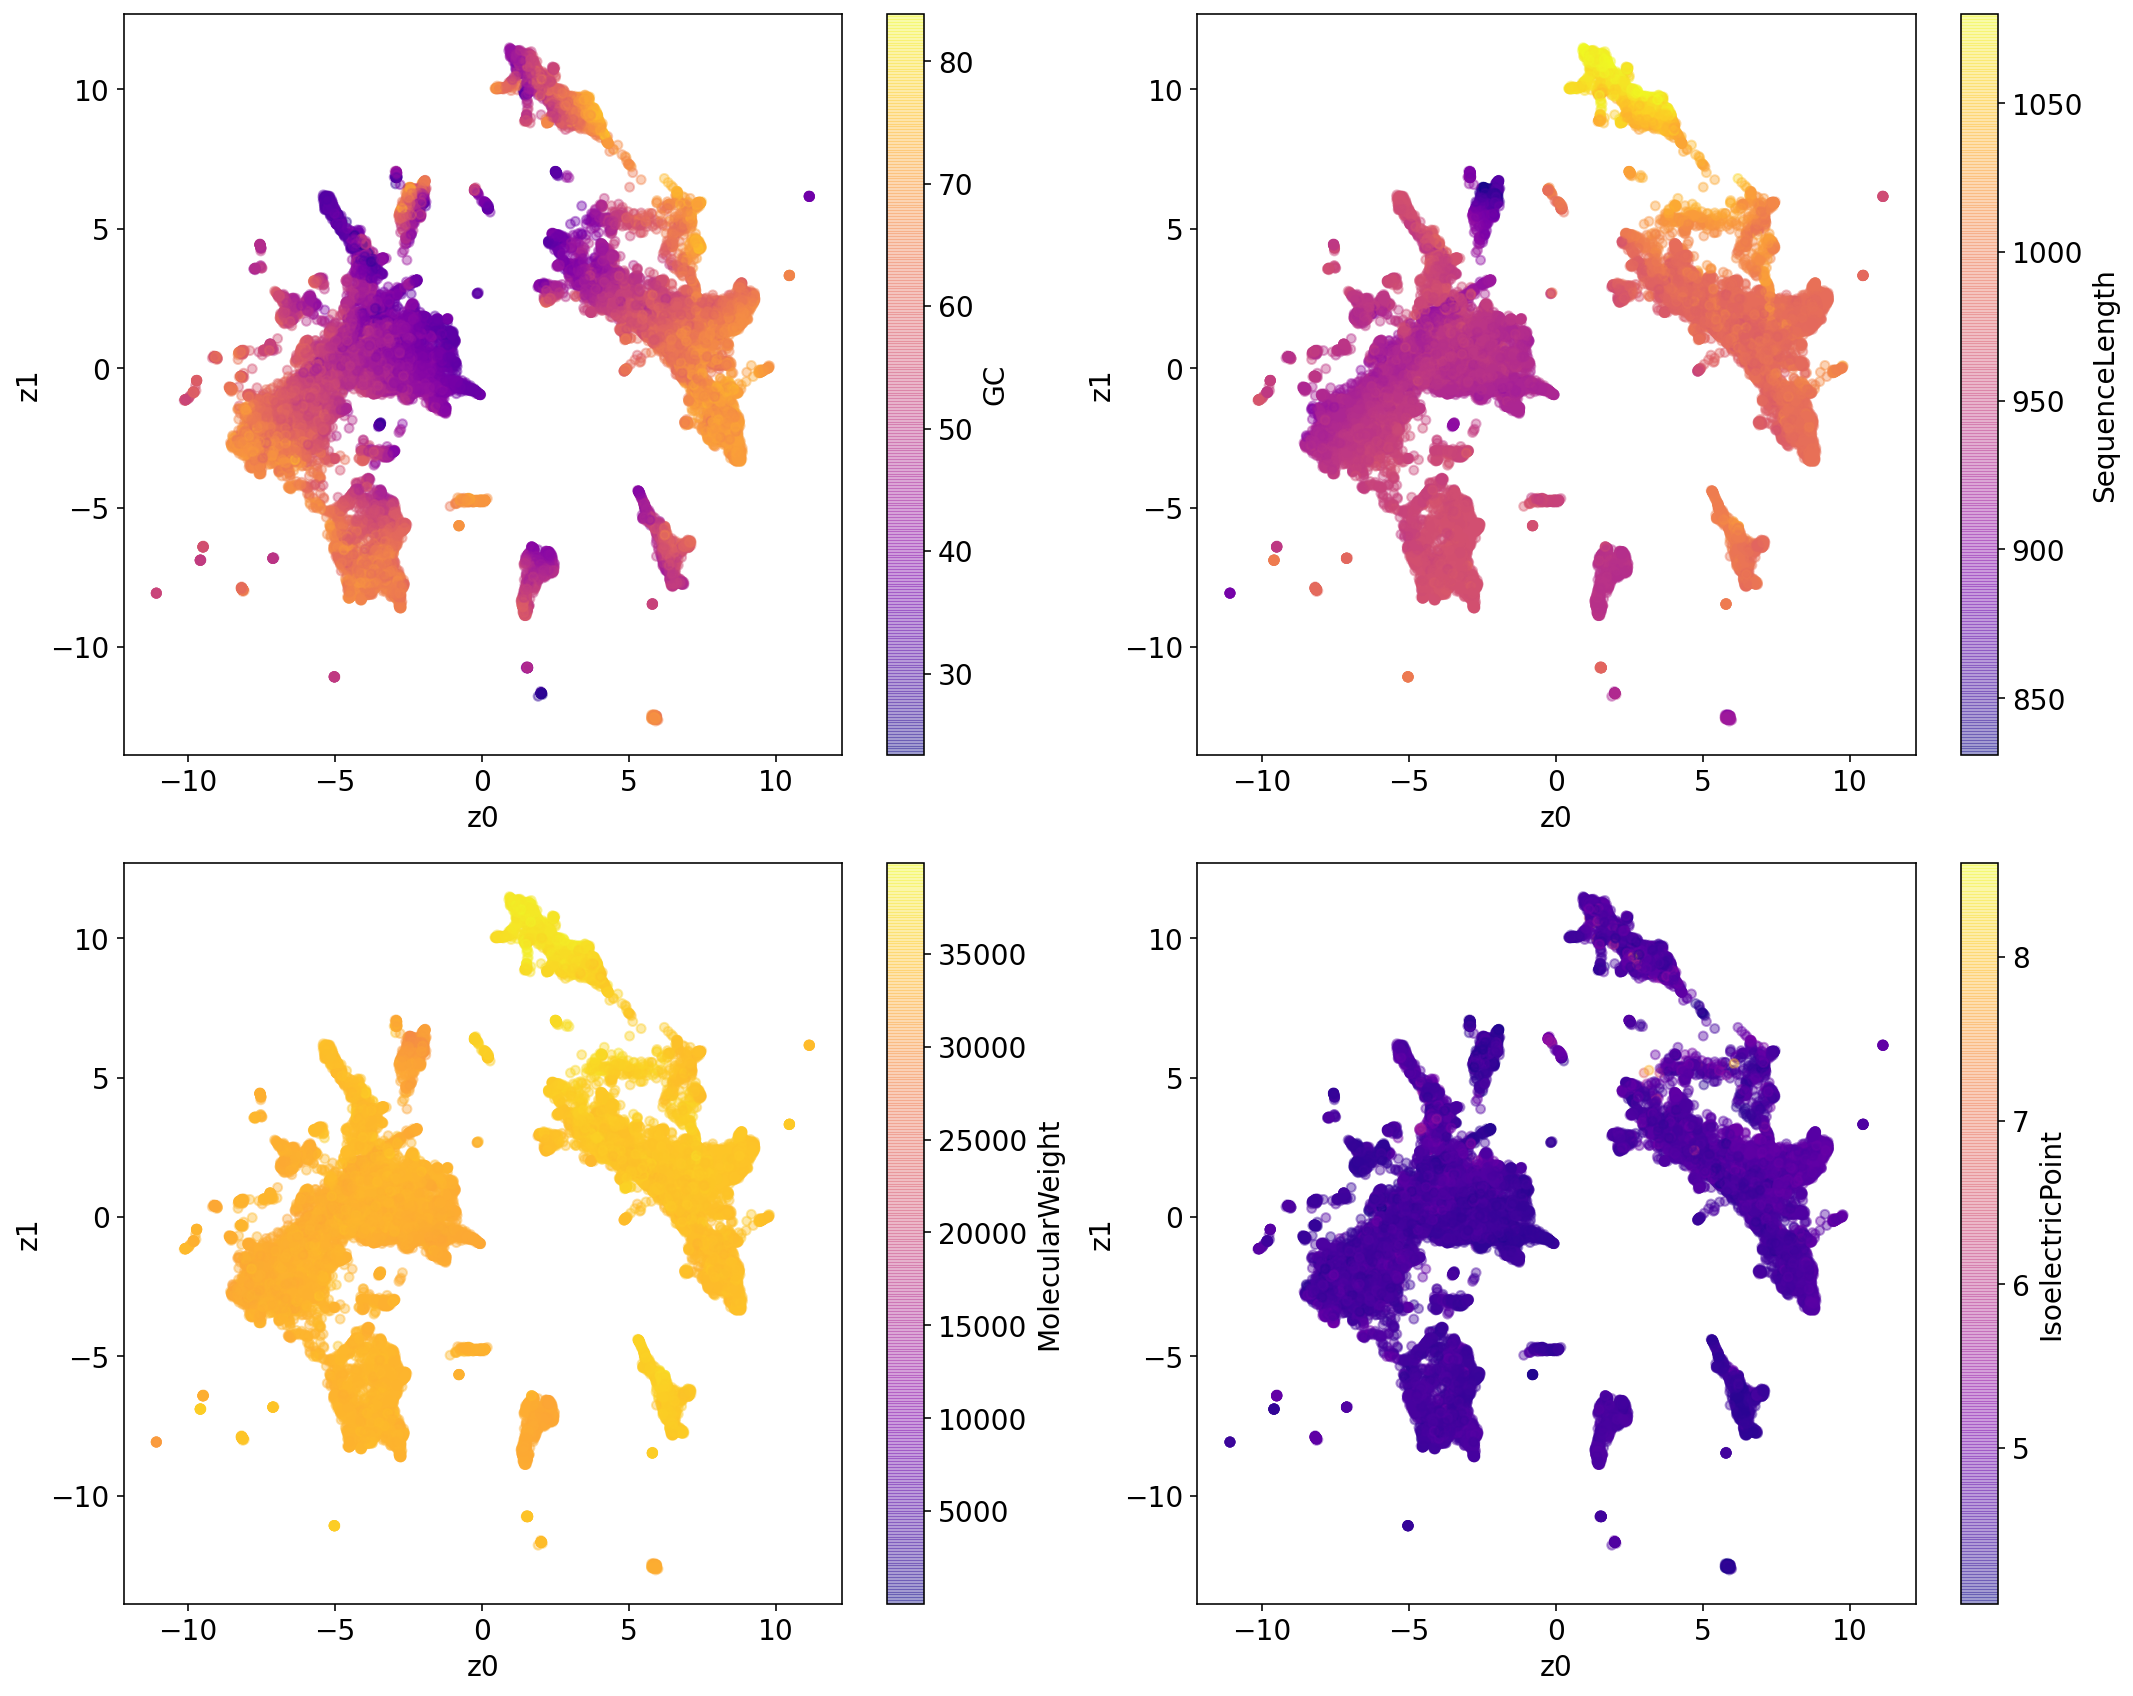

In [69]:
train_embed_path = Path("/homes/abrace/data/mdh/polaris-gptneox-25M-patric-foundation-inference-on-mdh/mdh_train_embeddings.npy")
train_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/train_folder_concatenated.fasta")

embed_avg = np.load(train_embed_path)
val_paint_df = visualize.get_paint_df(fasta_path=train_fasta_path, embed_path=train_embed_path)
# if getting all plots as subplots of a collective image, add the argument get_subplots=True
visualize.get_cluster(embed_data=embed_avg, paint_df=val_paint_df, tsne_umap="umap", get_subplots=True)

# 4. Plot embedding L2 distance vs. alignment score 
Example: Global alignment. <br>
Note: Local alignment scores would currently look the same as global alignment scores, since the scoring metrics for either have not been tuned and are thus the same. 

### Test sequences

In [72]:
test_embed_path = Path("/homes/abrace/data/mdh/polaris-gptneox-25M-patric-foundation-inference-on-mdh/mdh_test_embeddings.npy")
test_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/test_folder_concatenated.fasta")

align_plot_title = "Test Sequences"
alignment_type = "global"
num_workers = 80
match_score = 1.0
mismatch_score = 0.0
open_gap_score = 0.0
extend_gap_score = 0.0

In [71]:
dna_seqs = metrics.get_seqs_from_fasta(fasta_path=test_fasta_path)
embed = np.load(test_embed_path)
dna_seqs = dna_seqs[: len(embed)]  # clip DNA sequence to embedding length
protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=dna_seqs)

/lambda_stor/homes/abrace/src/mdlearn/conda-env/lib/python3.7/site-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [73]:
# Compute the pairwise global alignment score
test_protein_align_scores_matrix = metrics.alignment_scores_parallel(
    seqs1_rec=protein_seqs,
    seqs2_rec=protein_seqs,
    alignment_type=alignment_type,
    num_workers=num_workers,
    match_score=match_score,
    mismatch_score=mismatch_score,
    open_gap_score=open_gap_score,
    extend_gap_score=extend_gap_score,
)

3663it [05:13, 11.69it/s]


In [ ]:
test_scores_df = metrics.get_scores_df(
    embed_avg=embed_avg,
    scores_matrix=test_protein_align_scores_matrix,
    alignment_type=alignment_type,
)
test_scores_df.corr()

<AxesSubplot:title={'center':'Test Sequences'}, xlabel='Global Alignment Score', ylabel='Embedding L2 Distance'>

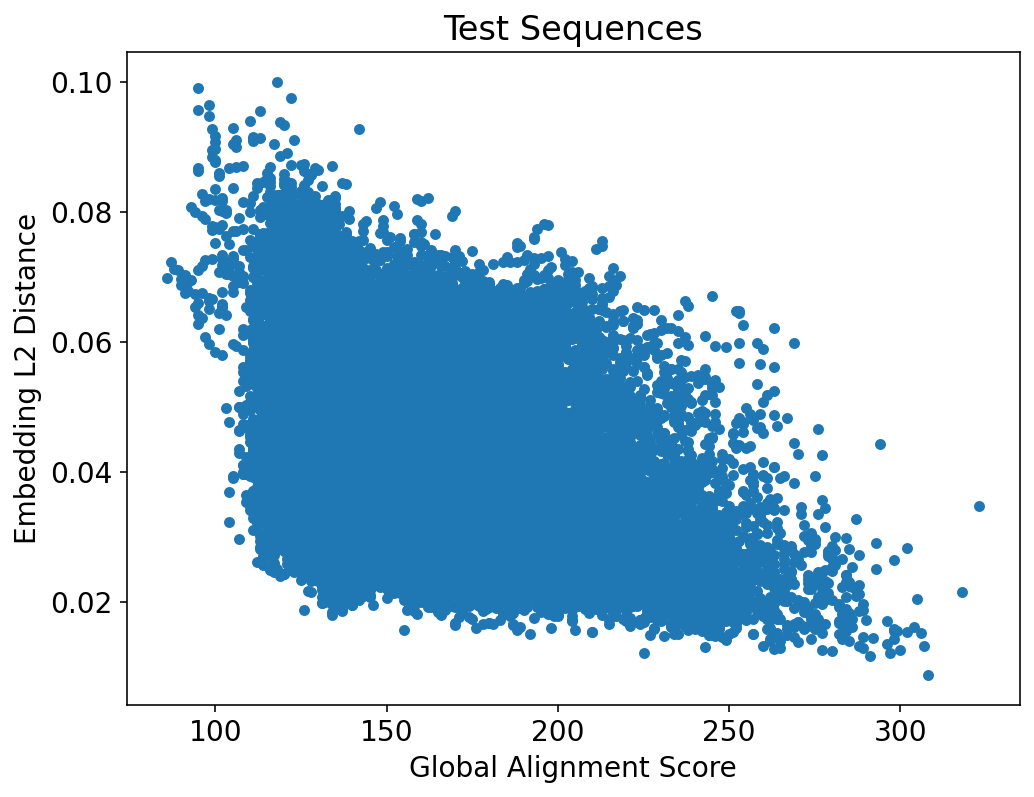

In [17]:
test_scores_df[::100].plot.scatter(y="Embedding L2 Distance", 
                              x="Global Alignment Score",
                                  title=align_plot_title)

In [18]:
test_avg_scores_df = metrics.get_avg_scores_df(
    scores_df=test_scores_df, alignment_type=alignment_type, 
)
test_avg_scores_df.corr()

avg_embed_dist  stdev_embed_dist  \
avg_embed_dist                1.000000          0.260468   
stdev_embed_dist              0.260468          1.000000   
Global Alignment Score       -0.948369         -0.413782   

                        Global Alignment Score  
avg_embed_dist                       -0.948369  
stdev_embed_dist                     -0.413782  
Global Alignment Score                1.000000

In [19]:
test_avg_scores_df

avg_embed_dist  stdev_embed_dist  Global Alignment Score
0          0.079348          0.000000                    73.0
1          0.081063          0.000000                    75.0
2          0.085119          0.000000                    76.0
3          0.072306          0.000000                    77.0
4          0.074422          0.001482                    78.0
..              ...               ...                     ...
259        0.016378          0.000000                   336.0
260        0.015953          0.000000                   338.0
261        0.010014          0.000000                   342.0
262        0.014459          0.000000                   343.0
263        0.015228          0.000000                   348.0

[264 rows x 3 columns]

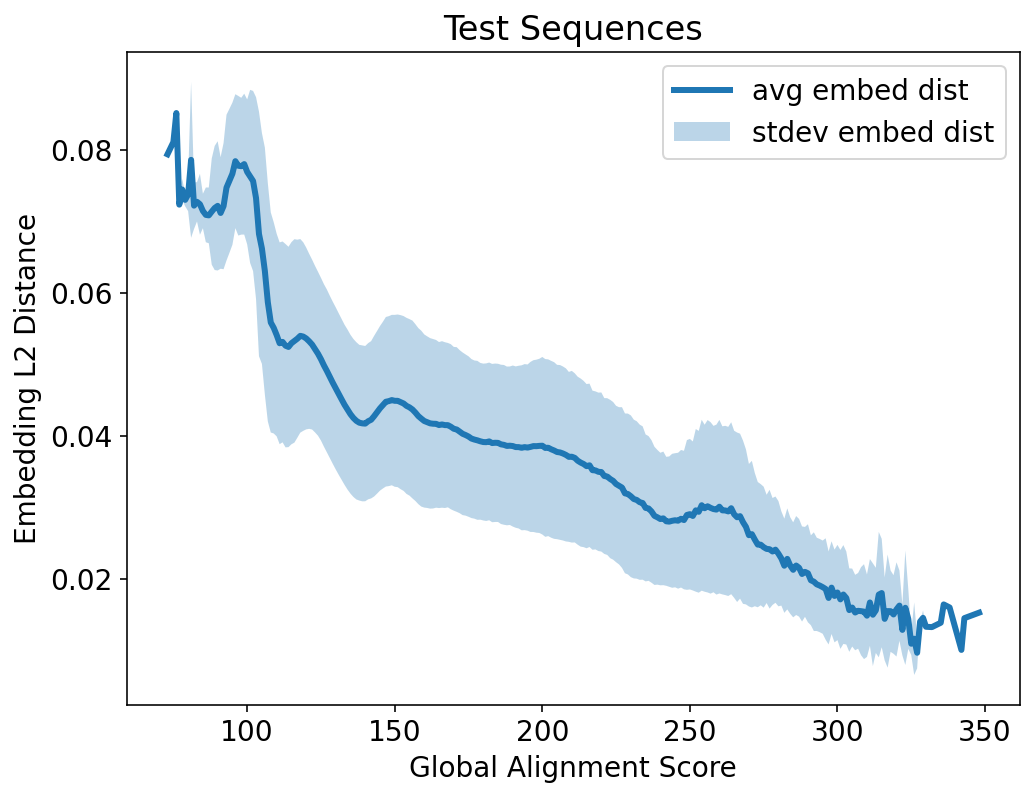

In [21]:
# plot the embedding L2 distance against the pairwise global alignment scores
visualize.plot_embed_dist_vs_align_score(
    avg_scores_df=test_avg_scores_df,
    alignment_type=alignment_type,
    plot_title=align_plot_title
)

In [28]:
# calculate the p-value of the Pearson correlation
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between average embedding distance and global alignment score
corr_result = pearsonr(test_avg_scores_df["avg_embed_dist"], test_avg_scores_df["Global Alignment Score"])
pearson_corr = corr_result[0] # Pearson correlation
p_val = corr_result[1] # p-value
print(corr_result)
print(pearson_corr)
print(p_val)

(-0.9672055828568472, 5.899958216431588e-158)
-0.9672055828568472
5.899958216431588e-158


/tmp/ipykernel_3191048/3023642792.py:2: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


### Validation sequences

In [29]:
val_embed_path = Path("/homes/mzvyagin/MDH/perlmutter_data/inference-val-embeddings.npy")
val_fasta_path = Path("/homes/mzvyagin/MDH/gene_transformer/gene_transformer/data/full_mdh_fasta/val.fasta")
save_path = Path("/homes/lind/MDH-pipeline/visualize/embed_dist_vs_align_score_val.png")
align_plot_title = "Validation Sequences"
alignment_type = "global"
num_workers = 70
match_score = 1.0
mismatch_score = 0.0
open_gap_score = 0.0
extend_gap_score = 0.0

In [30]:
embed_avg = metrics.get_embed_avg(embed_path=val_embed_path)
dna_seqs = metrics.get_seqs_from_fasta(fasta_path=val_fasta_path)
embed = np.load(val_embed_path)
dna_seqs = dna_seqs[: len(embed)]  # clip DNA sequence to embedding length
protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=dna_seqs)

/homes/lind/.conda/envs/mdhpipeline/lib/python3.9/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [31]:
# Compute the pairwise global alignment score
val_protein_align_scores_matrix = metrics.alignment_scores_parallel(
    seqs1_rec=protein_seqs,
    seqs2_rec=protein_seqs,
    alignment_type=alignment_type,
    num_workers=num_workers,
    match_score=match_score,
    mismatch_score=mismatch_score,
    open_gap_score=open_gap_score,
    extend_gap_score=extend_gap_score,
)

3664it [04:52, 12.54it/s]


In [32]:
val_scores_df = metrics.get_scores_df(
    embed_avg=embed_avg,
    scores_matrix=val_protein_align_scores_matrix,
    alignment_type=alignment_type,
)
val_scores_df.corr()

Embedding L2 Distance  Global Alignment Score
Embedding L2 Distance                1.000000               -0.299994
Global Alignment Score              -0.299994                1.000000

<AxesSubplot:title={'center':'Validation Sequences'}, xlabel='Global Alignment Score', ylabel='Embedding L2 Distance'>

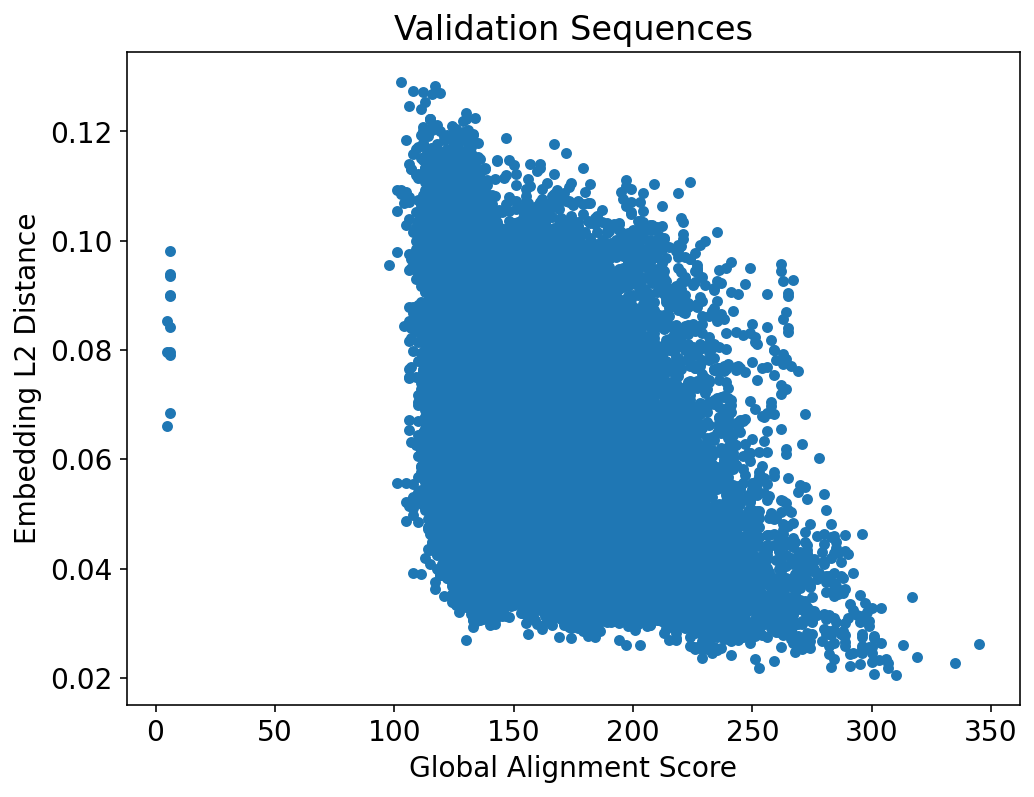

In [33]:
val_scores_df[::100].plot.scatter(y="Embedding L2 Distance", 
                              x="Global Alignment Score", 
                              title=align_plot_title)

In [34]:
val_avg_scores_df = metrics.get_avg_scores_df(
    scores_df=val_scores_df, alignment_type=alignment_type
)
val_avg_scores_df.corr()

avg_embed_dist  stdev_embed_dist  \
avg_embed_dist                1.000000          0.635039   
stdev_embed_dist              0.635039          1.000000   
Global Alignment Score       -0.939610         -0.676550   

                        Global Alignment Score  
avg_embed_dist                        -0.93961  
stdev_embed_dist                      -0.67655  
Global Alignment Score                 1.00000

Embedding distance vs. alignment score plot has been saved to /homes/lind/MDH-pipeline/visualize/embed_dist_vs_align_score_val.png.


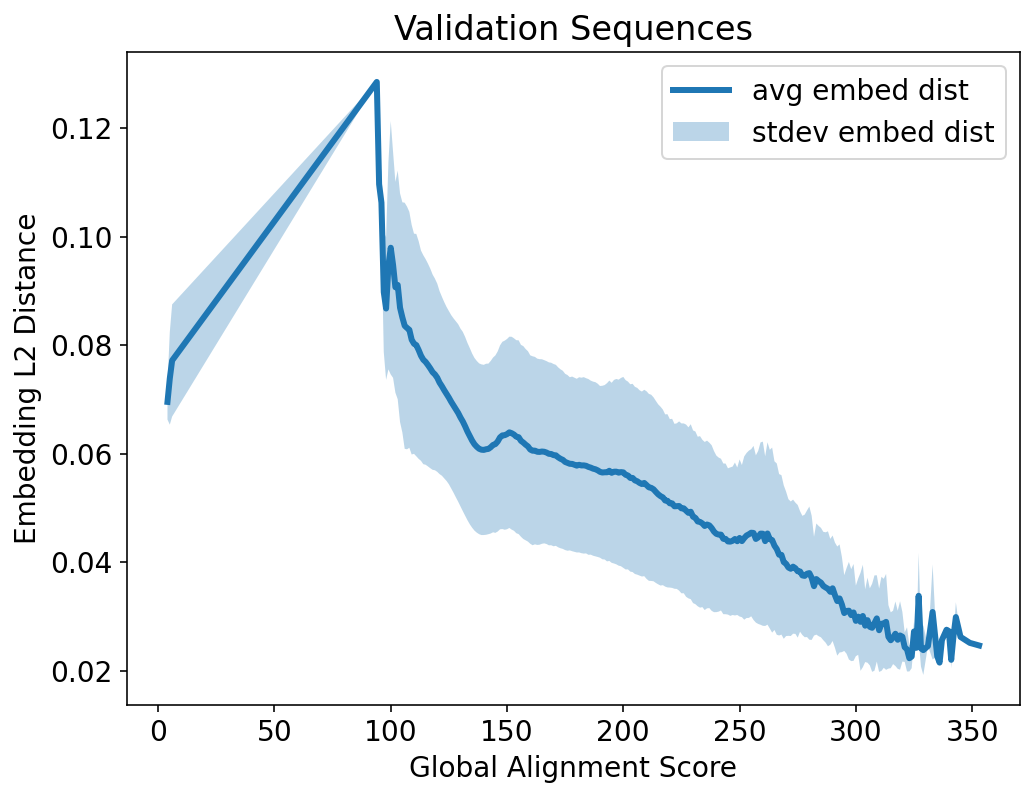

In [35]:
# plot the embedding L2 distance against the pairwise global alignment scores
visualize.plot_embed_dist_vs_align_score(
    avg_scores_df=val_avg_scores_df,
    save_path=save_path,
    alignment_type=alignment_type,
    plot_title=align_plot_title
)

# 5. Compute pairwise alignment between two types of sequences and select a specified number of sequences with the highest mean or max alignment score values.

Dataset: MDH GPT2 likely-wood-857

In [36]:
save_path = Path("/homes/lind/MDH-pipeline/visualize/gen_test_align.png")

num_workers = 70
match_score = 1.0
mismatch_score = 0.0
open_gap_score = 0.0
extend_gap_score = 0.0

In [37]:
# generated sequences
gen_embed_path = Path("/homes/mzvyagin/mdh_gpt2/likely-wood-857/likely-wood-857-1024concat_seqs_fasta_embeddings_mean.npy")
gen_fasta_path = Path("/homes/mzvyagin/mdh_gpt2/likely-wood-857/likely-wood-857_1024concat_seqs.fasta")
alignment_type = "global"

embed_avg = np.load(gen_embed_path)
dna_seqs = metrics.get_seqs_from_fasta(fasta_path=gen_fasta_path)
protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=dna_seqs)
gen_protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=dna_seqs)

In [38]:
# test sequences
test_embed_path = Path("/homes/mzvyagin/mdh_gpt2/likely-wood-857/likely-wood-857-test_fasta_embeddings_mean.npy")
test_fasta_path = Path("/homes/mzvyagin/MDH/gene_transformer/gene_transformer/data/full_mdh_fasta/test.fasta")
alignment_type = "global"

embed_avg = np.load(test_embed_path)
dna_seqs = metrics.get_seqs_from_fasta(fasta_path=test_fasta_path)
embed = np.load(test_embed_path)
dna_seqs = dna_seqs[: len(embed)]  # clip DNA sequence to embedding length
test_protein_seqs = metrics.dna_to_protein_seqs(dna_seqs=dna_seqs)

/homes/lind/.conda/envs/mdhpipeline/lib/python3.9/site-packages/Bio/Seq.py:2979: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


In [39]:
gen_test_align_scores_matrix = metrics.alignment_scores_parallel(
    seqs1_rec=gen_protein_seqs,
    seqs2_rec=test_protein_seqs,
    alignment_type=alignment_type,
    num_workers=num_workers,
    match_score=match_score,
    mismatch_score=mismatch_score,
    open_gap_score=open_gap_score,
    extend_gap_score=extend_gap_score,
)

1024it [01:34, 10.89it/s]


{'mean': array([149.25793217, 152.50464989, 160.34436543, ..., 162.40536105,
        156.93271335, 140.82439825]),
 'max': array([285., 271., 268., ..., 302., 284., 288.]),
 'min': array([ 90.,  90.,  93., ..., 100.,  92., 101.])}

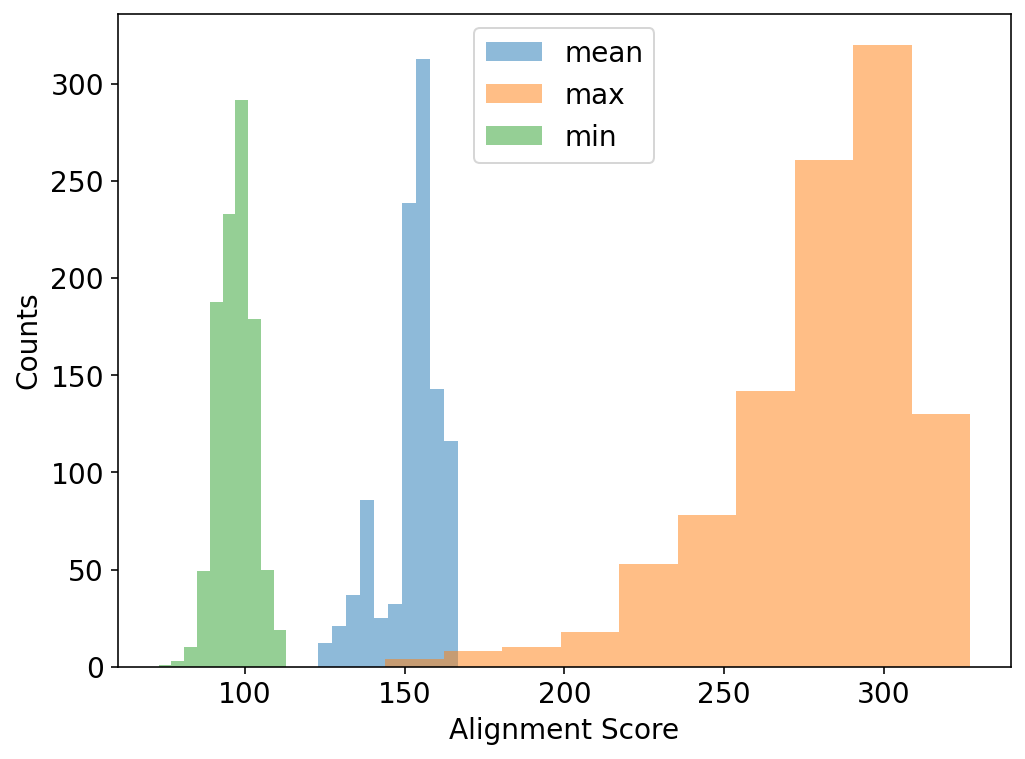

In [40]:
visualize.plot_align_hist_mean_max_min(gen_test_align_scores_matrix)